# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [17]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 637


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [34]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    
    
    # Create endpoint URL with each city
    city_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | guarapari
Processing Record 2 of Set 1 | kodiak
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | haiku-pauwela
Processing Record 6 of Set 1 | talnakh
Processing Record 7 of Set 1 | howrah
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | port elizabeth
Processing Record 10 of Set 1 | oodweyne
Processing Record 11 of Set 1 | weining
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | zouerate
Processing Record 14 of Set 1 | papatowai
Processing Record 15 of Set 1 | bethel
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | isle of lewis
City not found. Skipping...
Processing Record 18 of Set 1 | san patricio
Processing Record 19 of Set 1 | nefta
Processing Record 20 of Set 1 | bridgewater
Processing Record 21 of Set 1 | tiksi
Processing Record 22 of Set 1 | musay'

Processing Record 38 of Set 4 | bredasdorp
Processing Record 39 of Set 4 | kourou
Processing Record 40 of Set 4 | kiama
Processing Record 41 of Set 4 | viligili
City not found. Skipping...
Processing Record 42 of Set 4 | iguape
Processing Record 43 of Set 4 | belyy yar
Processing Record 44 of Set 4 | puerto baquerizo moreno
Processing Record 45 of Set 4 | rio gallegos
Processing Record 46 of Set 4 | cargados carajos
City not found. Skipping...
Processing Record 47 of Set 4 | uturoa
Processing Record 48 of Set 4 | atafu village
Processing Record 49 of Set 4 | maktar
Processing Record 0 of Set 5 | greymouth
Processing Record 1 of Set 5 | plastun
Processing Record 2 of Set 5 | la ronge
Processing Record 3 of Set 5 | susaki
Processing Record 4 of Set 5 | prince rupert
Processing Record 5 of Set 5 | nandikotkur
Processing Record 6 of Set 5 | port moresby
Processing Record 7 of Set 5 | tikhvin
Processing Record 8 of Set 5 | alice springs
Processing Record 9 of Set 5 | mount pearl
Processing 

Processing Record 27 of Set 8 | cedeira
Processing Record 28 of Set 8 | bardai
Processing Record 29 of Set 8 | tangalle
Processing Record 30 of Set 8 | belmonte
Processing Record 31 of Set 8 | ulan bator
Processing Record 32 of Set 8 | akrehamn
Processing Record 33 of Set 8 | las lomitas
Processing Record 34 of Set 8 | mirny
Processing Record 35 of Set 8 | anadyr
Processing Record 36 of Set 8 | praia da vitoria
Processing Record 37 of Set 8 | juye
Processing Record 38 of Set 8 | az zubayr
Processing Record 39 of Set 8 | mossel bay
Processing Record 40 of Set 8 | luanda
Processing Record 41 of Set 8 | tazovsky
Processing Record 42 of Set 8 | isangel
Processing Record 43 of Set 8 | las tablas
Processing Record 44 of Set 8 | luderitz
Processing Record 45 of Set 8 | kindu
Processing Record 46 of Set 8 | shihezi
Processing Record 47 of Set 8 | barrouallie
Processing Record 48 of Set 8 | palembang
Processing Record 49 of Set 8 | tchibanga
Processing Record 0 of Set 9 | mahdia
Processing Reco

Processing Record 20 of Set 12 | shitanjing
Processing Record 21 of Set 12 | necocli
Processing Record 22 of Set 12 | klishkivtsi
Processing Record 23 of Set 12 | gap
Processing Record 24 of Set 12 | pisco
Processing Record 25 of Set 12 | igrim
Processing Record 26 of Set 12 | eyl
Processing Record 27 of Set 12 | pontianak
Processing Record 28 of Set 12 | inari
Processing Record 29 of Set 12 | nakhon si thammarat
Processing Record 30 of Set 12 | qurayyat
Processing Record 31 of Set 12 | armacao de buzios
Processing Record 32 of Set 12 | harnosand
Processing Record 33 of Set 12 | minacu
City not found. Skipping...
Processing Record 34 of Set 12 | pont rouge
Processing Record 35 of Set 12 | kirakira
Processing Record 36 of Set 12 | borogontsy
Processing Record 37 of Set 12 | turkeli
Processing Record 38 of Set 12 | matias barbosa
Processing Record 39 of Set 12 | kavaratti
Processing Record 40 of Set 12 | suwayr
Processing Record 41 of Set 12 | dera bugti
Processing Record 42 of Set 12 | 

In [35]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          611
Lat           611
Lng           611
Max Temp      611
Humidity      611
Cloudiness    611
Wind Speed    611
Country       611
Date          611
dtype: int64

In [36]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,guarapari,-20.6667,-40.4975,23.27,92,100,3.69,BR,1704085006
1,kodiak,57.7900,-152.4072,-1.27,93,100,2.57,US,1704085049
2,albany,42.6001,-73.9662,0.78,80,100,0.62,US,1704085051
3,puerto ayora,-0.7393,-90.3518,24.19,96,15,2.91,EC,1704085053
4,haiku-pauwela,20.9219,-156.3051,23.01,75,20,3.60,US,1704085055


In [37]:
# Converting Date to something more useable
city_data_df['Date']=(pd.to_datetime(city_data_df['Date'],unit='s')).dt.date
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,guarapari,-20.6667,-40.4975,23.27,92,100,3.69,BR,2024-01-01
1,kodiak,57.7900,-152.4072,-1.27,93,100,2.57,US,2024-01-01
2,albany,42.6001,-73.9662,0.78,80,100,0.62,US,2024-01-01
3,puerto ayora,-0.7393,-90.3518,24.19,96,15,2.91,EC,2024-01-01
4,haiku-pauwela,20.9219,-156.3051,23.01,75,20,3.60,US,2024-01-01


In [38]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [39]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,guarapari,-20.6667,-40.4975,23.27,92,100,3.69,BR,2024-01-01
1,kodiak,57.7900,-152.4072,-1.27,93,100,2.57,US,2024-01-01
2,albany,42.6001,-73.9662,0.78,80,100,0.62,US,2024-01-01
3,puerto ayora,-0.7393,-90.3518,24.19,96,15,2.91,EC,2024-01-01
4,haiku-pauwela,20.9219,-156.3051,23.01,75,20,3.60,US,2024-01-01


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

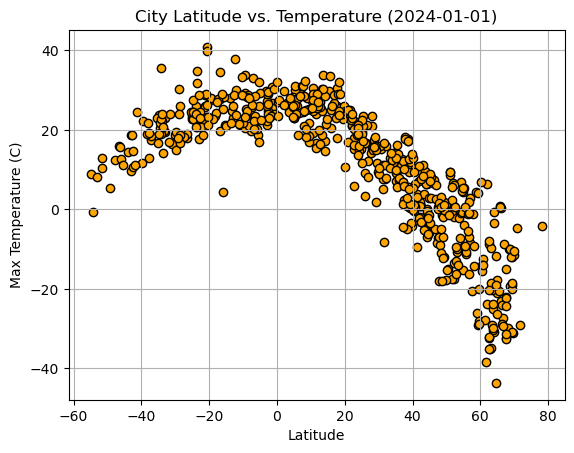

In [60]:
# Build scatter plot for latitude vs. temperature
city_latitude = city_data_df["Lat"]
city_temp = city_data_df["Max Temp"]
date = city_data_df["Date"].min()
# New dataframe for this data
lat_temp_df = pd.DataFrame({"Latitude":city_latitude, "Max Temperature (C)":city_temp})
# Setting axis
x_lat_temp = lat_temp_df["Latitude"]
y_lat_temp = lat_temp_df["Max Temperature (C)"]
# Making the graph
plt.scatter(x_lat_temp,y_lat_temp,marker = "o",facecolors = "orange", edgecolors = "black")
plt.title(f"City Latitude vs. Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Incorporate the other graph properties
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

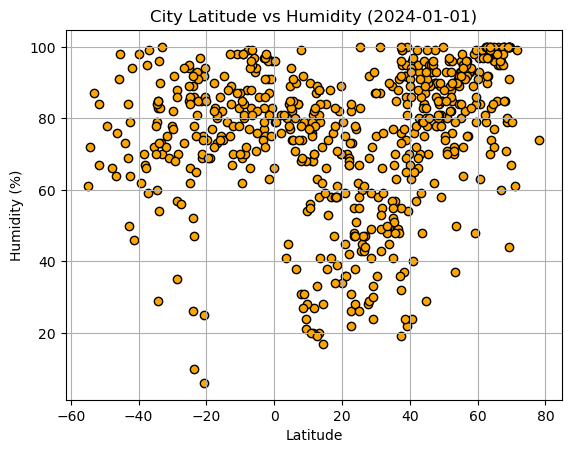

In [61]:
# Build the scatter plots for latitude vs. humidity
city_humidity = city_data_df["Humidity"]
plt.scatter(city_latitude,city_humidity,marker = "o",facecolors = "orange", edgecolors = "black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity ({date})")

# Incorporate the other graph properties
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

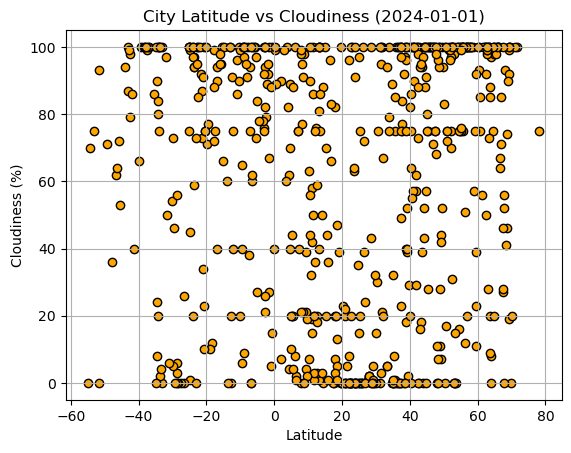

In [62]:
# Build the scatter plots for latitude vs. cloudiness
city_cloudiness = city_data_df["Cloudiness"]
plt.scatter(city_latitude, city_cloudiness, marker = "o", facecolors = "orange", edgecolors = "black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness ({date})")

# Incorporate the other graph properties
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

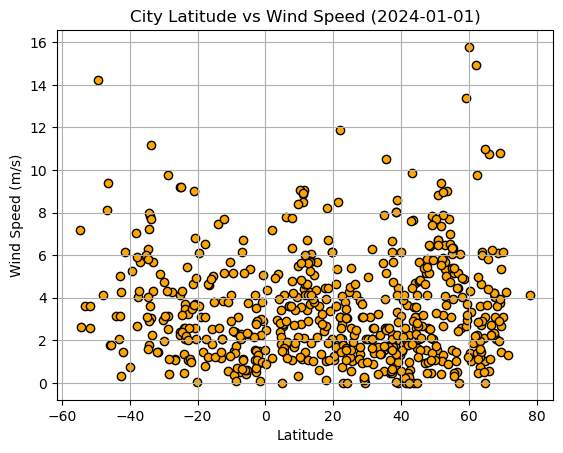

In [64]:
# Build the scatter plots for latitude vs. wind speed
city_wspeed = city_data_df["Wind Speed"]
plt.scatter(city_latitude, city_wspeed, marker = "o", facecolors = "orange", edgecolors = "black")
plt.title(f"City Latitude vs Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Incorporate the other graph properties
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [65]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kodiak,57.7900,-152.4072,-1.27,93,100,2.57,US,2024-01-01
2,albany,42.6001,-73.9662,0.78,80,100,0.62,US,2024-01-01
4,haiku-pauwela,20.9219,-156.3051,23.01,75,20,3.60,US,2024-01-01
5,talnakh,69.4865,88.3972,-31.00,100,100,1.47,RU,2024-01-01
6,howrah,22.5892,88.3103,18.00,82,0,2.06,IN,2024-01-01


In [66]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,guarapari,-20.6667,-40.4975,23.27,92,100,3.69,BR,2024-01-01
3,puerto ayora,-0.7393,-90.3518,24.19,96,15,2.91,EC,2024-01-01
7,port-aux-francais,-49.3500,70.2167,5.42,78,71,14.24,TF,2024-01-01
8,port elizabeth,-33.9180,25.5701,20.05,96,100,3.60,ZA,2024-01-01
11,ushuaia,-54.8000,-68.3000,8.81,61,0,7.20,AR,2024-01-01


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8927


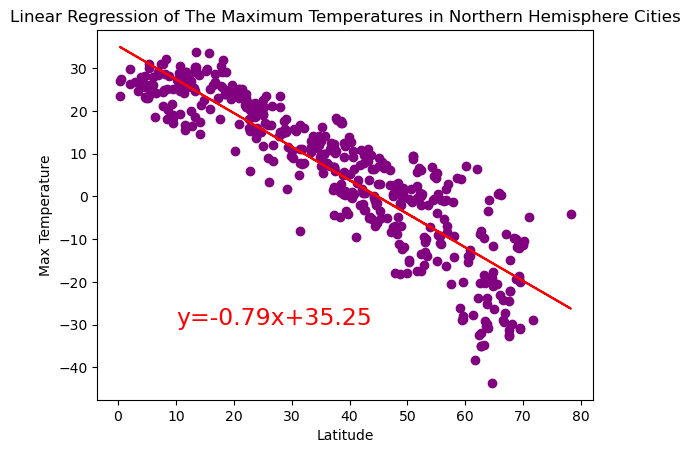

In [85]:
# Linear regression on Northern Hemisphere
max_north_temp = northern_hemi_df["Max Temp"]
north_lat = northern_hemi_df["Lat"]
plt.scatter(north_lat, max_north_temp, marker = "o", facecolors = "purple")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Linear Regression of The Maximum Temperatures in Northern Hemisphere Cities")
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat,max_north_temp)
reg_nt = north_lat * slope + intercept
leq_nt = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))
plt.plot(north_lat, reg_nt, "r-")
plt.annotate(leq_nt, (10,-30), fontsize = 17, color = "red")
# Printing the r-value comment
print(f"The r-value is: {round(rvalue,4)}")

The r-value is: 0.6078


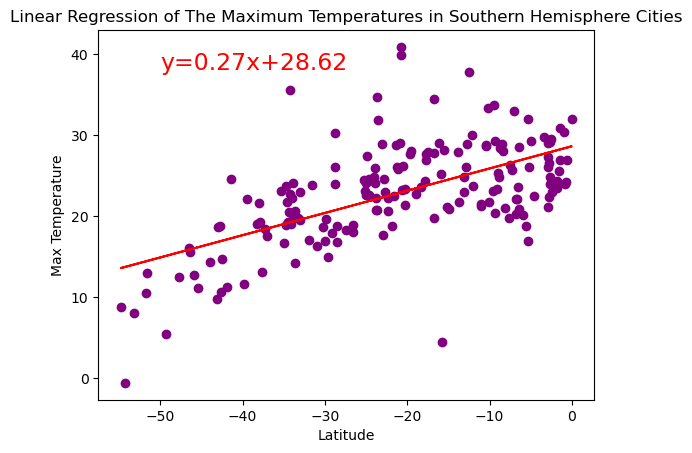

In [83]:
# Linear regression on Southern Hemisphere
max_south_temp = southern_hemi_df["Max Temp"]
south_lat = southern_hemi_df["Lat"]
plt.scatter(south_lat, max_south_temp, marker = "o", facecolors = "purple")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Linear Regression of The Maximum Temperatures in Southern Hemisphere Cities")
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat,max_south_temp)
reg_st = south_lat * slope + intercept
leq_st = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))
plt.plot(south_lat, reg_st, "r-")
plt.annotate(leq_st, (-50,38), fontsize = 17, color = "red")
# Printing the r-value comment
print(f"The r-value is: {round(rvalue,4)}")

**Discussion about the linear relationship:** It can be observed that as the latitude approaches 0, the maximum temperature increases. As the 0 degree latitude refers to the equator, it can be stated that cities situated on or near the equator can be expected to have greater maximum temperatures. With r-values of -0.8927 and 0.6078, meaning that there is a strong relationship and a somewhat strong relationship between temperatures and latitude for the northern and southern cities respectively.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.4386


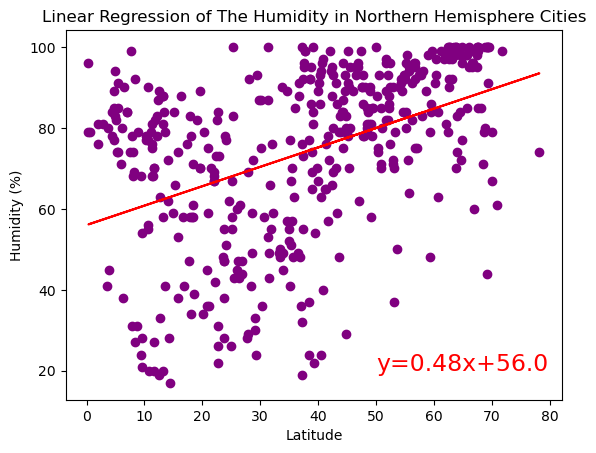

In [82]:
# Northern Hemisphere
north_hum = northern_hemi_df["Humidity"]
north_lat = northern_hemi_df["Lat"]
plt.scatter(north_lat, north_hum, marker = "o", facecolors = "purple")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Linear Regression of The Humidity in Northern Hemisphere Cities")
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat,north_hum)
reg_nh = north_lat * slope + intercept
leq_nh = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))
plt.plot(north_lat, reg_nh, "r-")
plt.annotate(leq_nh, (50,20), fontsize = 17, color = "red")
# Printing the r-value comment
print(f"The r-value is: {round(rvalue,4)}")

The r-value is: 0.2426


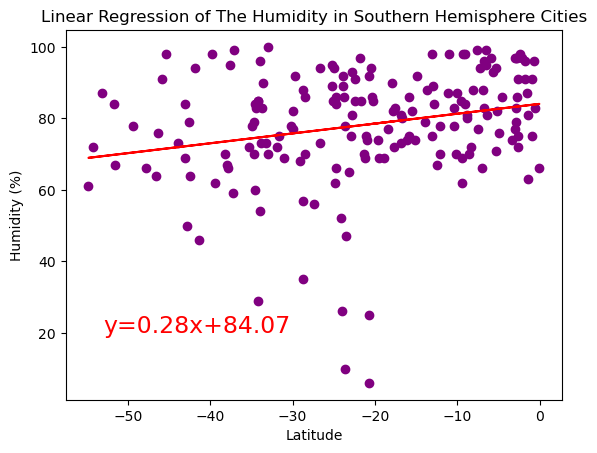

In [86]:
# Southern Hemisphere
south_hum = southern_hemi_df["Humidity"]
south_lat = southern_hemi_df["Lat"]
plt.scatter(south_lat, south_hum, marker = "o", facecolors = "purple")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Linear Regression of The Humidity in Southern Hemisphere Cities")
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat,south_hum)
reg_sh = south_lat * slope + intercept
leq_sh = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))
plt.plot(south_lat, reg_sh, "r-")
plt.annotate(leq_sh, (-53,20), fontsize = 17, color = "red")
# Printing the r-value comment
print(f"The r-value is: {round(rvalue,4)}")

**Discussion about the linear relationship:** It can be observed that as the latitude increases, the observed humidity increases as well, but as the r-value is only 0.4386, the relationship between the two is only moderately positive. With the southern hemisphere, as the latitude grows closer to 0, the humidity-latitude relationship is very slightly positive, due to the r-value of 0.2426. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.3101


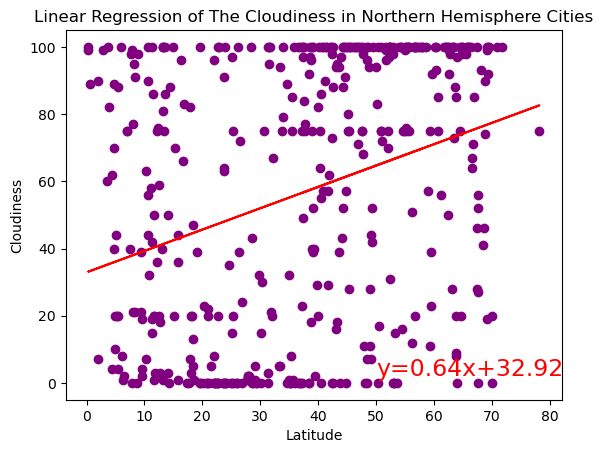

In [91]:
# Northern Hemisphere
north_cld = northern_hemi_df["Cloudiness"]
north_lat = northern_hemi_df["Lat"]
plt.scatter(north_lat, north_cld, marker = "o", facecolors = "purple")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Linear Regression of The Cloudiness in Northern Hemisphere Cities")
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat,north_cld)
reg_nc = north_lat * slope + intercept
leq_nc = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))
plt.plot(north_lat, reg_nc, "r-")
plt.annotate(leq_nc, (50,2), fontsize = 17, color = "red")
# Printing the r-value comment
print(f"The r-value is: {round(rvalue,4)}")

The r-value is: 0.0815


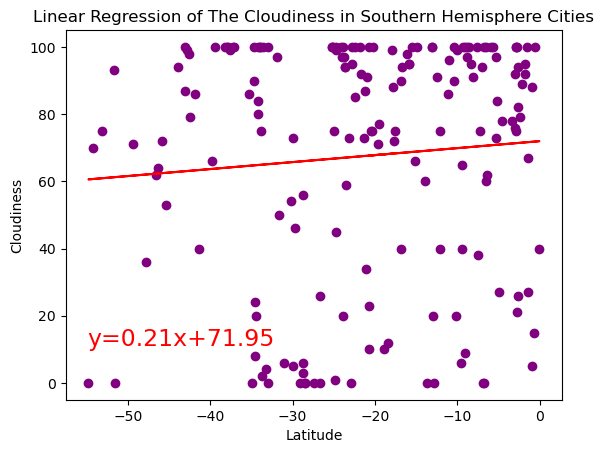

In [95]:
# Southern Hemisphere
south_cld = southern_hemi_df["Cloudiness"]
south_lat = southern_hemi_df["Lat"]
plt.scatter(south_lat, south_cld, marker = "o", facecolors = "purple")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Linear Regression of The Cloudiness in Southern Hemisphere Cities")
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat,south_cld)
reg_sc = south_lat * slope + intercept
leq_sc = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))
plt.plot(south_lat, reg_sc, "r-")
plt.annotate(leq_sc, (-55,11), fontsize = 17, color = "red")
# Printing the r-value comment
print(f"The r-value is: {round(rvalue,4)}")

**Discussion about the linear relationship:** It can be observed in the northern hemisphere that there is only a slightly strong positive relationship between cloudiness and latitude, indicating that as latitude increases, so does cloudiness. This is due to the r-value of 0.3101. In the southern hemisphere however, there is essentially no correlation between latitude and cloudiness, due to the r-value of 0.0815.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0573


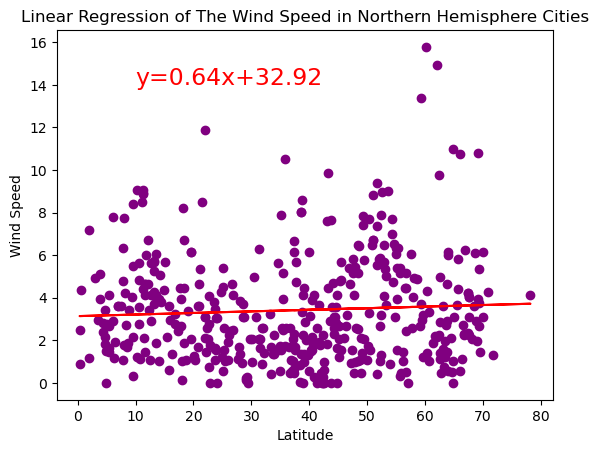

In [99]:
# Northern Hemisphere
north_wnd = northern_hemi_df["Wind Speed"]
north_lat = northern_hemi_df["Lat"]
plt.scatter(north_lat, north_wnd, marker = "o", facecolors = "purple")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Linear Regression of The Wind Speed in Northern Hemisphere Cities")
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat,north_wnd)
reg_nw = north_lat * slope + intercept
leq_nw = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))
plt.plot(north_lat, reg_nw, "r-")
plt.annotate(leq_nc, (10,14), fontsize = 17, color = "red")
# Printing the r-value comment
print(f"The r-value is: {round(rvalue,4)}")

The r-value is: -0.3471


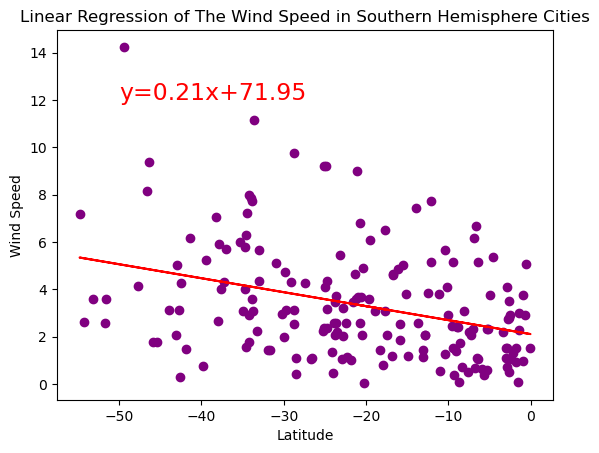

In [101]:
# Southern Hemisphere
south_wnd = southern_hemi_df["Wind Speed"]
south_lat = southern_hemi_df["Lat"]
plt.scatter(south_lat, south_wnd, marker = "o", facecolors = "purple")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Linear Regression of The Wind Speed in Southern Hemisphere Cities")
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat,south_wnd)
reg_sw = south_lat * slope + intercept
leq_sw = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))
plt.plot(south_lat, reg_sw, "r-")
plt.annotate(leq_sc, (-50,12), fontsize = 17, color = "red")
# Printing the r-value comment
print(f"The r-value is: {round(rvalue,4)}")

**Discussion about the linear relationship:** In the northern hemisphere, there is essentially no correlation between wind speed and latitude, the r-value of 0.0573 states as such. However in the southern hemisphere, there is a slightly negative correlation between latitude and windspeed, indicating that as the latitude approaches 0, wind speed decreases.